# TM271 TMA, District Sustainability Index (DSI) Prediction  🌿
### **End-to-End Machine Learning System | GCC Sustainability Innovation Lab**
---

This notebook presents a complete Machine Learning workflow to analyze sustainability indicators and predict the **District Sustainability Index (DSI)**.  
It is designed to be clean, professional, and ready for GitHub & LinkedIn presentation.

##### **Dataset:** tm271data.csv  
##### **Done By:** Nahla Nabil Skaik - 6230202  
##### **Supervisor:** Dr.Khalid Mansour 

---

## Load Dataset & Basic Checks

### Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
print("Libraries imported successfully ")

Libraries imported successfully 


## To have Custom CSS for Table and Text Formatting 😎
The following CSS enhances table visualization by centering text and improving the layout of DataFrame outputs.

In [2]:
# Set display options
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 2000)
pd.set_option('display.max_columns', None)

In [3]:
from IPython.display import HTML

HTML("""
<style>
table.dataframe {
    border-collapse: collapse;
    width: 100%;
    table-layout: fixed;
}

/* header cells */
table.dataframe th {
    background-color: #cfe4ff;
    color: #003366;
    padding: 8px;
    border: 1px solid #aacbee;
    text-align: center !important;   /* CENTER TEXT */
    vertical-align: middle !important;
    font-weight: bold;
    word-wrap: break-word;
}

/* body cells */
table.dataframe td {
    padding: 8px;
    border: 1px solid #d5e6f5;
    text-align: center !important;   /* CENTER TEXT */
    vertical-align: middle !important;
    white-space: normal !important;
    word-wrap: break-word !important;
}


<style>
h1 {
    color: #003366 !important;  
    font-weight: 700 !important;
}

h2 {
    color: #e63946 !important;   /* Red */
    font-weight: 700 !important;
}

h3 {
    color: #2ecc71 !important;   /* Green */
    font-weight: 700 !important;
}

h4 {
    color: #ff69b4 !important;   /* Pink */
    font-weight: 700 !important;
}

h5 {
    color: #17a2b8 !important;   /* Purple */
    font-weight: 700 !important;
}
</style>

</style>
""")

---
# Part A:

### Load Dataset

In [4]:
df = pd.read_csv("tm271data.csv")

### Data Exploration 

In [5]:
#File Size Check
import os
file_size = os.path.getsize("tm271data.csv")
print(f"\nFile Size: {file_size:,} bytes ({file_size/1024:.2f} KB)")


File Size: 58,664 bytes (57.29 KB)


### Basic Shape Info

In [6]:
print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")

Dataset Shape: 1020 rows × 9 columns


### Check for Missing Columns (expected columns)

In [7]:
expected_columns = [
    'district_id', 'district_name', 'CO2_emission_kilotons',
    'Average_energy_consumption_kWh_per_household', 'Green_area_per_capita_m2',
    'Waste_recycling_rate_pct', 'Population_density_people_per_km2',
    'Traffic_index_0_100', 'DSI_target_0_100'
]

missing_cols = [col for col in expected_columns if col not in df.columns]
if missing_cols:
    print(f" Missing columns: {missing_cols}")
else:
    print(" All expected columns are present!")

 All expected columns are present!


### Duplicate Rows Check

In [8]:
duplicate_count = df.duplicated().sum()
print(f"\n Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print(f"   → Removing {duplicate_count} duplicate rows...")
    df = df.drop_duplicates()
    print(f"   After removal: {df.shape[0]} rows")


 Number of duplicate rows: 20
   → Removing 20 duplicate rows...
   After removal: 1000 rows


### Missing Values Summary

In [9]:
total_missing = df.isnull().sum().sum()
print(f"Total missing values across dataset: {total_missing}")

total_cells = df.shape[0] * df.shape[1]
dirtiness_percentage = (total_missing / total_cells) * 100
print(f"Overall dirtiness percentage: {dirtiness_percentage:.2f}%")

missing_summary = df.isnull().sum().to_frame(name="Missing_Count")
missing_summary["Missing_%"] = (missing_summary["Missing_Count"] / len(df) * 100).round(2)

missing_summary

Total missing values across dataset: 486
Overall dirtiness percentage: 5.40%


,Missing_Count,Missing_%
district_id,52,5.2
district_name,51,5.1
CO2_emission_kilotons,43,4.3
Average_energy_consumption_kWh_per_household,52,5.2
Green_area_per_capita_m2,60,6.0
Waste_recycling_rate_pct,54,5.4
Population_density_people_per_km2,53,5.3
Traffic_index_0_100,66,6.6
DSI_target_0_100,55,5.5


In [10]:
print("Shape:", df.shape)

Shape: (1000, 9)


In [11]:
df.head(5) 

,district_id,district_name,CO2_emission_kilotons,Average_energy_consumption_kWh_per_household,Green_area_per_capita_m2,Waste_recycling_rate_pct,Population_density_people_per_km2,Traffic_index_0_100,DSI_target_0_100
0,D524,District_524,1154.60,10771.2,6.85,32.3,1363.8,NaN,25.50
1,D603,District_603,286.76,NaN,32.78,36.7,143.0,NaN,65.37
2,D527,District_527,861.63,10140.8,16.31,20.4,1769.3,61.5,34.42
3,D032,District_032,287.53,7300.5,42.34,43.4,NaN,52.2,71.68
4,D617,District_617,83.49,6403.1,34.81,46.0,145.7,24.9,76.69


In [12]:
df.tail(5) 

,district_id,district_name,CO2_emission_kilotons,Average_energy_consumption_kWh_per_household,Green_area_per_capita_m2,Waste_recycling_rate_pct,Population_density_people_per_km2,Traffic_index_0_100,DSI_target_0_100
1015,D107,District_107,278.54,7677.2,41.86,44.7,88.1,41.1,73.03
1016,D271,District_271,640.15,8375.2,34.52,21.6,1960.1,46.9,53.71
1017,D861,District_861,1043.29,9210.5,15.70,42.2,1000.4,NaN,41.01
1018,D436,NaN,489.09,7547.0,24.86,44.8,154.0,45.3,62.93
1019,D103,District_103,531.45,8969.1,32.20,40.4,283.3,NaN,59.08


In [13]:
df.columns.tolist()

['district_id',
 'district_name',
 'CO2_emission_kilotons',
 'Average_energy_consumption_kWh_per_household',
 'Green_area_per_capita_m2',
 'Waste_recycling_rate_pct',
 'Population_density_people_per_km2',
 'Traffic_index_0_100',
 'DSI_target_0_100']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1019
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   district_id                                   948 non-null    object 
 1   district_name                                 949 non-null    object 
 2   CO2_emission_kilotons                         957 non-null    float64
 3   Average_energy_consumption_kWh_per_household  948 non-null    float64
 4   Green_area_per_capita_m2                      940 non-null    float64
 5   Waste_recycling_rate_pct                      946 non-null    float64
 6   Population_density_people_per_km2             947 non-null    float64
 7   Traffic_index_0_100                           934 non-null    float64
 8   DSI_target_0_100                              945 non-null    float64
dtypes: float64(7), object(2)
memory usage: 78.1+ KB


In [15]:
df.describe()

,CO2_emission_kilotons,Average_energy_consumption_kWh_per_household,Green_area_per_capita_m2,Waste_recycling_rate_pct,Population_density_people_per_km2,Traffic_index_0_100,DSI_target_0_100
count,957.000000,948.000000,940.000000,946.000000,947.000000,934.000000,945.000000
mean,629.987941,8567.462236,29.303043,39.731501,637.305913,55.356103,55.105153
std,258.511824,1435.045442,8.377738,9.080727,698.500321,19.904441,12.936851
min,20.000000,3809.500000,3.120000,6.100000,80.000000,5.000000,13.100000
25%,456.800000,7583.625000,23.505000,33.825000,227.350000,42.700000,46.930000
50%,626.870000,8548.000000,29.405000,39.800000,414.600000,55.200000,55.530000
75%,808.290000,9438.375000,34.810000,45.900000,763.600000,68.500000,63.740000
max,1440.280000,12894.800000,55.810000,68.700000,7511.400000,95.000000,92.590000


## Some Data Visualizations:

### - Missing Values Per Feature
This bar chart highlights how many missing entries appear in each feature.  
It provides a clearer comparison than the heatmap and helps identify which variables require imputation.

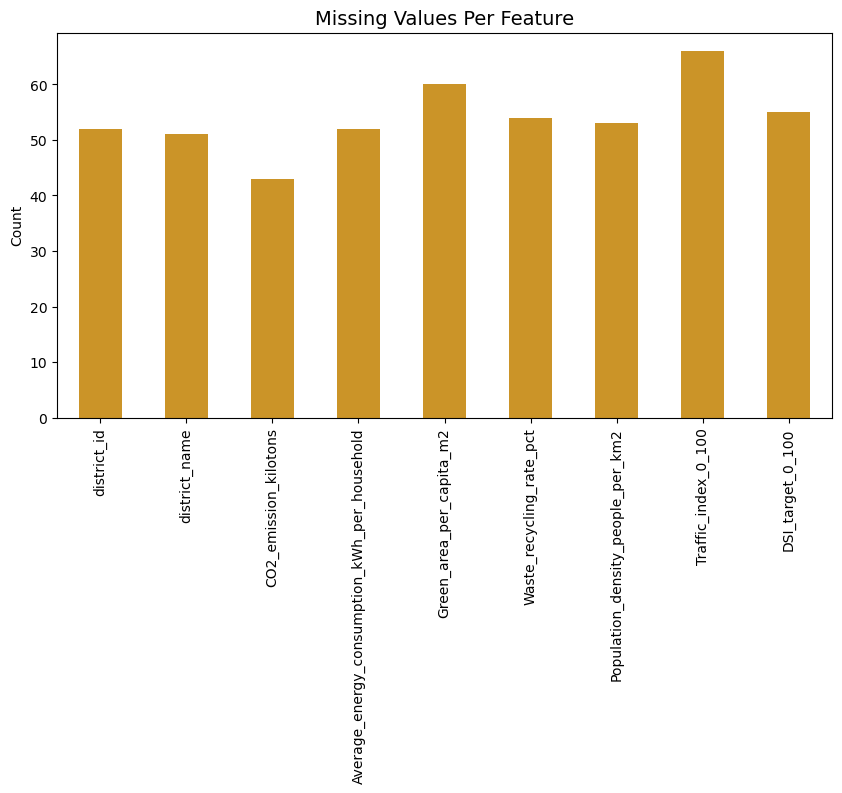

In [16]:
missing = df.isnull().sum()
missing = missing[missing > 0]

plt.figure(figsize=(10,5))
missing.plot(kind="bar", color="#CB9428")
plt.title("Missing Values Per Feature", fontsize=14)
plt.ylabel("Count")
plt.show()

### - Correlation Heatmap of Sustainability Indicators
The correlation heatmap visualizes the strength and direction of relationships between numerical features.  
Positive correlations appear in red, while negative correlations appear in blue.  
This helps identify which sustainability factors are most strongly associated with the DSI score.

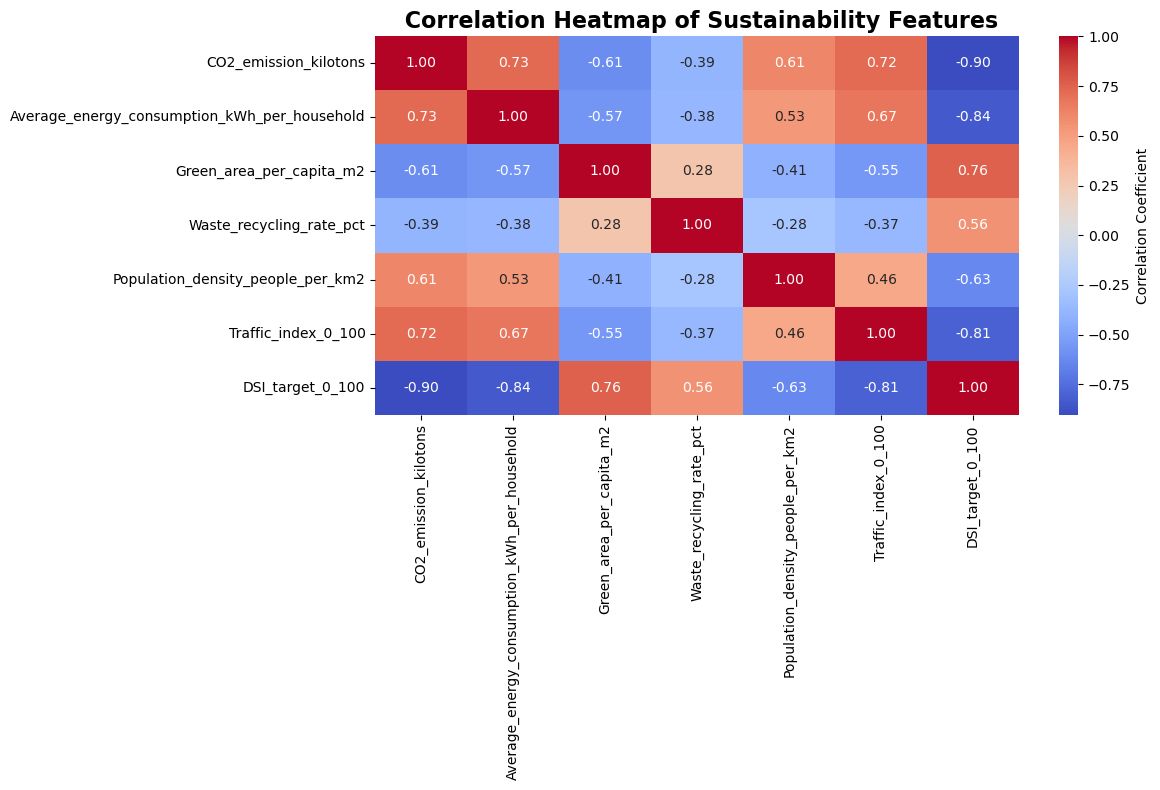

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", 
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title(" Correlation Heatmap of Sustainability Features", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('plot1_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

### Scatter Plot - CO2 vs DSI

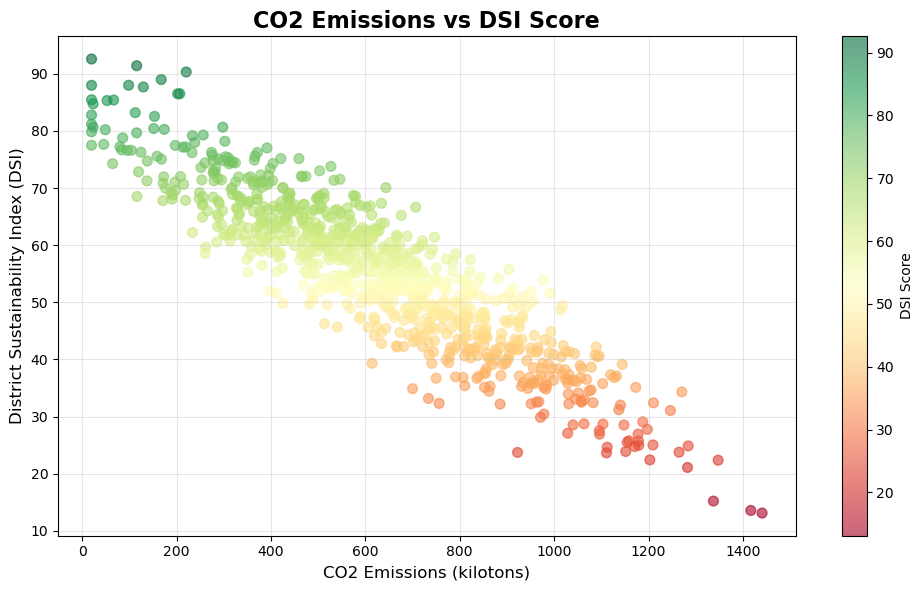

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['CO2_emission_kilotons'], df['DSI_target_0_100'], 
            alpha=0.6, c=df['DSI_target_0_100'], cmap='RdYlGn', s=50)
plt.colorbar(label='DSI Score')
plt.xlabel('CO2 Emissions (kilotons)', fontsize=12)
plt.ylabel('District Sustainability Index (DSI)', fontsize=12)
plt.title('CO2 Emissions vs DSI Score', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('plot2_co2_vs_dsi.png', dpi=300, bbox_inches='tight')
plt.show()

### Distribution Plots (Histograms)

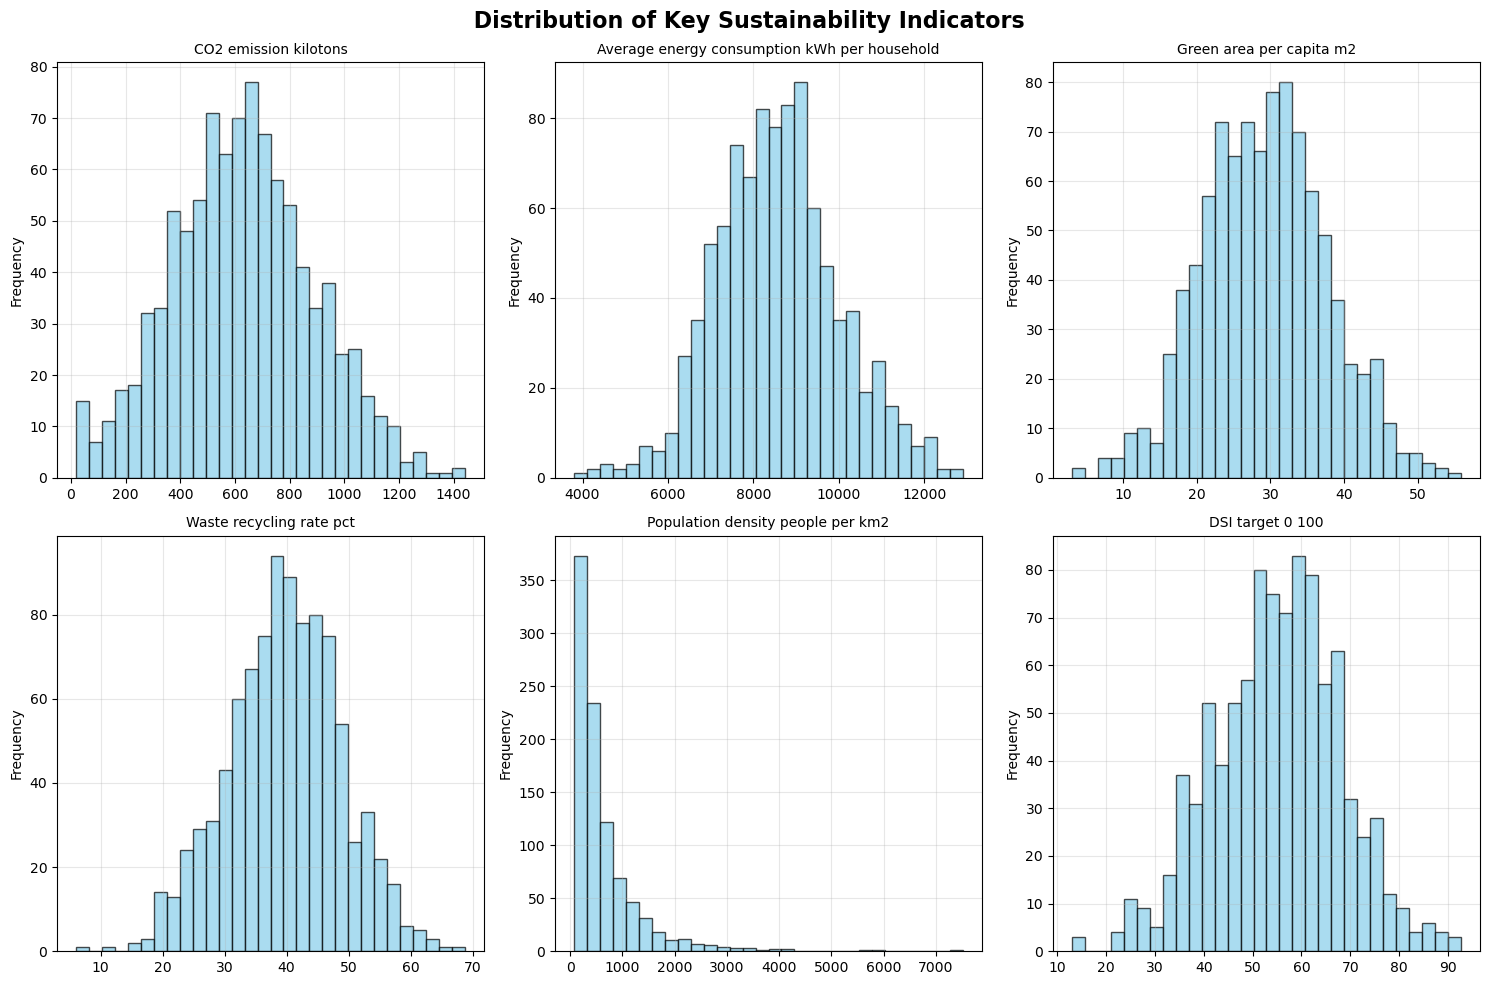

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(' Distribution of Key Sustainability Indicators', 
             fontsize=16, fontweight='bold')

features_to_plot = [
    'CO2_emission_kilotons',
    'Average_energy_consumption_kWh_per_household',
    'Green_area_per_capita_m2',
    'Waste_recycling_rate_pct',
    'Population_density_people_per_km2',
    'DSI_target_0_100'
]

for idx, col in enumerate(features_to_plot):
    ax = axes[idx // 3, idx % 3]
    df[col].dropna().hist(bins=30, ax=ax, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(col.replace('_', ' '), fontsize=10)
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plot3_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

### Pairplot

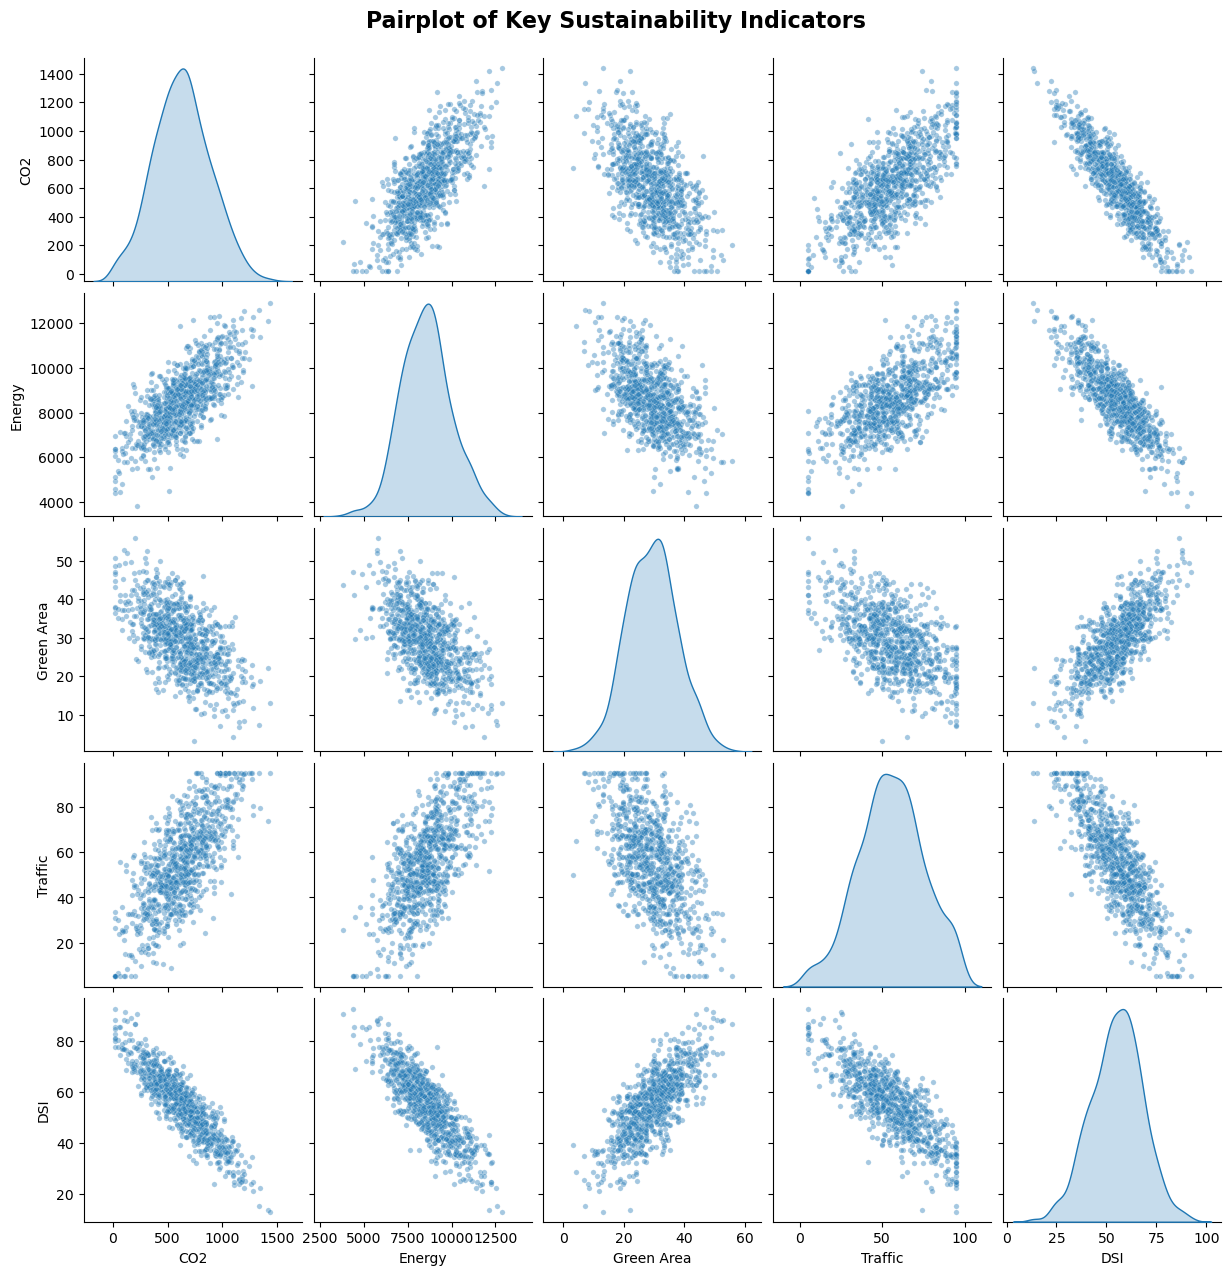

In [20]:
cols = [
    "CO2_emission_kilotons",
    "Average_energy_consumption_kWh_per_household",
    "Green_area_per_capita_m2",
    "Traffic_index_0_100",
    "DSI_target_0_100"
]

df_pair = df[cols].rename(columns={
    "CO2_emission_kilotons": "CO2",
    "Average_energy_consumption_kWh_per_household": "Energy",
    "Green_area_per_capita_m2": "Green Area",
    "Traffic_index_0_100": "Traffic",
    "DSI_target_0_100": "DSI"
})

g = sns.pairplot(df_pair, diag_kind="kde", plot_kws={"alpha": 0.4, "s": 15})
g.fig.suptitle("Pairplot of Key Sustainability Indicators", 
               y=1.02, fontsize=16, fontweight='bold')
plt.savefig('plot4_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

#### THREE KEY OBSERVATIONS FROM EDA:
---
1️⃣ OBSERVATION 1: Strong Positive Correlation between CO2 and Energy
   → Correlation coefficient: 0.732
   → Interpretation: Districts with higher household energy consumption tend to have
      higher CO2 emissions. This suggests energy efficiency improvements could
      directly reduce carbon footprint.

2️⃣ OBSERVATION 2: Green Area Shows Positive Impact on Sustainability
   → Correlation with DSI: 0.758
   → Interpretation: Districts with more green space per capita tend to have higher
      sustainability scores. Investing in parks and green infrastructure can
      improve overall district sustainability.

3️⃣ OBSERVATION 3: Traffic Congestion Negatively Affects Sustainability
   → Correlation with DSI: -0.808
   → Interpretation: Higher traffic index scores (more congestion) are associated
      with lower DSI scores. Improving public transportation could enhance
      sustainability outcomes.

---
# Part B

## Data Preprocessing

In this section, we clean and prepare the dataset for Machine Learning.  
The preprocessing steps include handling missing values, encoding categorical variables, feature scaling, and preparing the final training dataset.


### MISSING VALUE HANDLING

In [21]:
df.dtypes

district_id                                      object
district_name                                    object
CO2_emission_kilotons                           float64
Average_energy_consumption_kWh_per_household    float64
Green_area_per_capita_m2                        float64
Waste_recycling_rate_pct                        float64
Population_density_people_per_km2               float64
Traffic_index_0_100                             float64
DSI_target_0_100                                float64
dtype: object

##### Removing Non-Predictive Columns: `district_id` and `district_name` because they do not contribute to the predictive model. These fields are identifiers, not meaningful numerical features.

In [22]:
# Prepare dataset (remove non-predictive columns)
df_clean = df.drop(["district_id", "district_name"], axis=1)

# Store original variance for comparison
original_variance = df_clean.var()
print("\n Original Variance per Feature:")
print(original_variance)


 Original Variance per Feature:
CO2_emission_kilotons                           6.682836e+04
Average_energy_consumption_kWh_per_household    2.059355e+06
Green_area_per_capita_m2                        7.018650e+01
Waste_recycling_rate_pct                        8.245960e+01
Population_density_people_per_km2               4.879027e+05
Traffic_index_0_100                             3.961868e+02
DSI_target_0_100                                1.673621e+02
dtype: float64


In [23]:
df_clean.head(3)

,CO2_emission_kilotons,Average_energy_consumption_kWh_per_household,Green_area_per_capita_m2,Waste_recycling_rate_pct,Population_density_people_per_km2,Traffic_index_0_100,DSI_target_0_100
0,1154.60,10771.2,6.85,32.3,1363.8,NaN,25.50
1,286.76,NaN,32.78,36.7,143.0,NaN,65.37
2,861.63,10140.8,16.31,20.4,1769.3,61.5,34.42


### METHOD 1: Drop Rows with Missing Values

In [24]:
df_method1 = df_clean.dropna()
variance_method1 = df_method1.var()

print(f"Original shape: {df_clean.shape}")
print(f"After dropping: {df_method1.shape}")
print(f"Rows removed: {df_clean.shape[0] - df_method1.shape[0]}")
print(f"\nVariance after dropping:")
print(variance_method1)

Original shape: (1000, 7)
After dropping: (677, 7)
Rows removed: 323

Variance after dropping:
CO2_emission_kilotons                           6.870111e+04
Average_energy_consumption_kWh_per_household    2.115295e+06
Green_area_per_capita_m2                        6.973178e+01
Waste_recycling_rate_pct                        8.665239e+01
Population_density_people_per_km2               5.513975e+05
Traffic_index_0_100                             3.956760e+02
DSI_target_0_100                                1.748855e+02
dtype: float64


### METHOD 2: Mean/Median Imputation

In [25]:
df_method2 = df_clean.fillna(df_clean.mean())
variance_method2 = df_method2.var()

print(f"Shape: {df_method2.shape}")
print(f"Missing values after imputation: {df_method2.isnull().sum().sum()}")
print(f"\nVariance after mean imputation:")
print(variance_method2)

Shape: (1000, 7)
Missing values after imputation: 0

Variance after mean imputation:
CO2_emission_kilotons                           6.395187e+04
Average_energy_consumption_kWh_per_household    1.952162e+06
Green_area_per_capita_m2                        6.597110e+01
Waste_recycling_rate_pct                        7.800232e+01
Population_density_people_per_km2               4.620180e+05
Traffic_index_0_100                             3.700123e+02
DSI_target_0_100                                1.581480e+02
dtype: float64


### METHOD 3: Predictive Imputation (KNN Imputer)

In [26]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
df_method3 = pd.DataFrame(
    knn_imputer.fit_transform(df_clean),
    columns=df_clean.columns
)
variance_method3 = df_method3.var()

print(f"Shape: {df_method3.shape}")
print(f"Missing values after KNN imputation: {df_method3.isnull().sum().sum()}")
print(f"\nVariance after KNN imputation:")
print(variance_method3)

Shape: (1000, 7)
Missing values after KNN imputation: 0

Variance after KNN imputation:
CO2_emission_kilotons                           6.484767e+04
Average_energy_consumption_kWh_per_household    1.986640e+06
Green_area_per_capita_m2                        6.806537e+01
Waste_recycling_rate_pct                        7.941579e+01
Population_density_people_per_km2               4.656203e+05
Traffic_index_0_100                             3.812641e+02
DSI_target_0_100                                1.631383e+02
dtype: float64


## VARIANCE COMPARISON

In [27]:
variance_comparison = pd.DataFrame({
    'Original': original_variance,
    'Method1_Drop': variance_method1,
    'Method2_Mean': variance_method2,
    'Method3_KNN': variance_method3
})

variance_comparison

,Original,Method1_Drop,Method2_Mean,Method3_KNN
CO2_emission_kilotons,6.682836e+04,6.870111e+04,6.395187e+04,6.484767e+04
Average_energy_consumption_kWh_per_household,2.059355e+06,2.115295e+06,1.952162e+06,1.986640e+06
Green_area_per_capita_m2,7.018650e+01,6.973178e+01,6.597110e+01,6.806537e+01
Waste_recycling_rate_pct,8.245960e+01,8.665239e+01,7.800232e+01,7.941579e+01
Population_density_people_per_km2,4.879027e+05,5.513975e+05,4.620180e+05,4.656203e+05
Traffic_index_0_100,3.961868e+02,3.956760e+02,3.700123e+02,3.812641e+02
DSI_target_0_100,1.673621e+02,1.748855e+02,1.581480e+02,1.631383e+02


In [28]:
# Variance change percentage
variance_change = pd.DataFrame({
    'Method1_Drop_%': ((variance_method1 - original_variance) / original_variance * 100),
    'Method2_Mean_%': ((variance_method2 - original_variance) / original_variance * 100),
    'Method3_KNN_%': ((variance_method3 - original_variance) / original_variance * 100)
})

print("\n Variance Change (%) from Original:-")
variance_change


 Variance Change (%) from Original:-


,Method1_Drop_%,Method2_Mean_%,Method3_KNN_%
CO2_emission_kilotons,2.802316,-4.304304,-2.963853
Average_energy_consumption_kWh_per_household,2.716342,-5.205205,-3.530984
Green_area_per_capita_m2,-0.647872,-6.006006,-3.022138
Waste_recycling_rate_pct,5.084656,-5.405405,-3.691272
Population_density_people_per_km2,13.013829,-5.305305,-4.566985
Traffic_index_0_100,-0.128917,-6.606607,-3.766566
DSI_target_0_100,4.495300,-5.505506,-2.523752


## Visualization

<Figure size 1400x600 with 0 Axes>

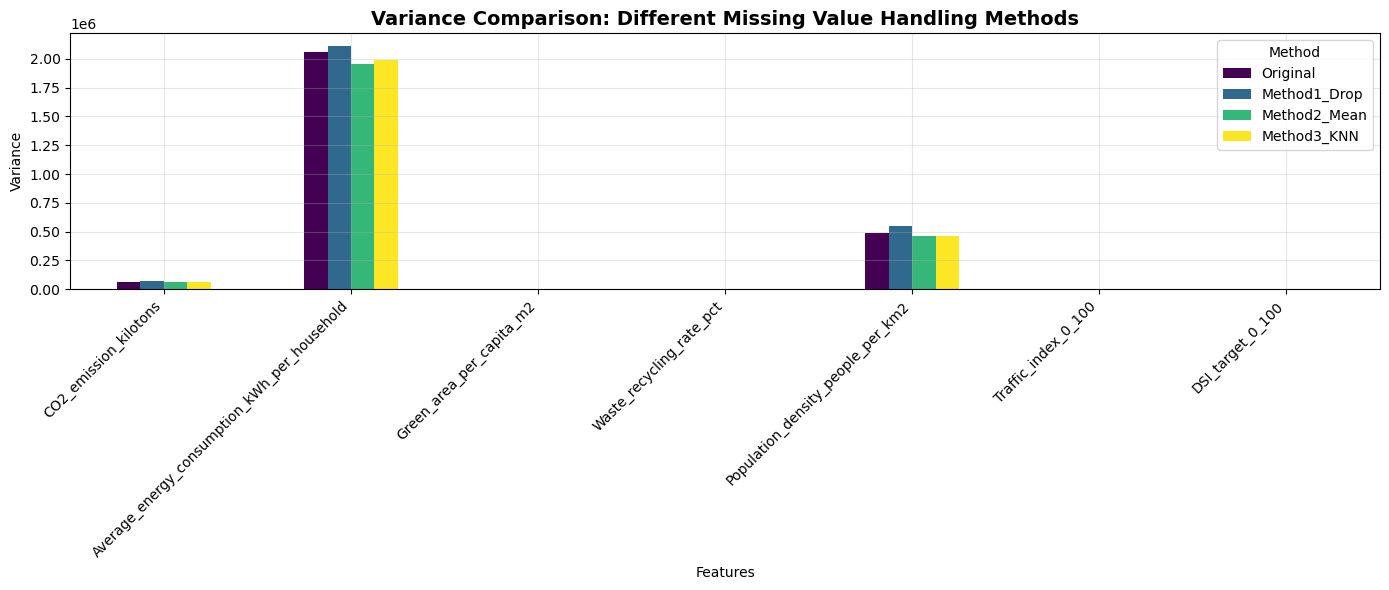

In [29]:
plt.figure(figsize=(14, 6))
variance_comparison.plot(kind='bar', figsize=(14, 6), colormap='viridis')
plt.title('Variance Comparison: Different Missing Value Handling Methods', 
          fontsize=14, fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Method')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('variance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

Conclusion: KNN Imputation preserves variance best while retaining all data!

In [30]:
# Use Method 2 (Mean Imputation) for rest of analysis
df_clean = df_method2.copy()

## FEATURE TRANSFORMATION

### DERIVED FEATURE 1: Energy per Capita

In [31]:
print("\n Creating Derived Feature 1: Energy per Capita")

df_clean['Energy_per_capita'] = (
    df_clean['Average_energy_consumption_kWh_per_household'] / 
    (df_clean['Population_density_people_per_km2'] + 1)  # +1 to avoid division by zero
)

print("Energy_per_capita = Energy_consumption / Population_density")
print(f"   → Mean: {df_clean['Energy_per_capita'].mean():.2f}")
print(f"   → Std: {df_clean['Energy_per_capita'].std():.2f}")


 Creating Derived Feature 1: Energy per Capita
Energy_per_capita = Energy_consumption / Population_density
   → Mean: 25.92
   → Std: 20.42


 #### WHY THIS IMPROVES INTERPRETABILITY:
   This feature normalizes energy consumption by population, revealing
   which districts are energy-intensive per person, not just per household.
   It helps identify inefficient areas regardless of population size.

### DERIVED FEATURE 2: Green Index

In [32]:
df_clean['Green_Index'] = (
    df_clean['Green_area_per_capita_m2'] / 
    (df_clean['Population_density_people_per_km2'] + 1)
)

print("Green_Index = Green_area_per_capita / Population_density")
print(f"   → Mean: {df_clean['Green_Index'].mean():.4f}")
print(f"   → Std: {df_clean['Green_Index'].std():.4f}")


Green_Index = Green_area_per_capita / Population_density
   → Mean: 0.1056
   → Std: 0.1121


#### WHY THIS IMPROVES INTERPRETABILITY ??
This feature shows the availability of green space relative to crowding.
Dense urban areas might have green space, but if overcrowded, the benefit
per person is reduced. This metric captures true green space accessibility.

## Visualize new features vs DSI

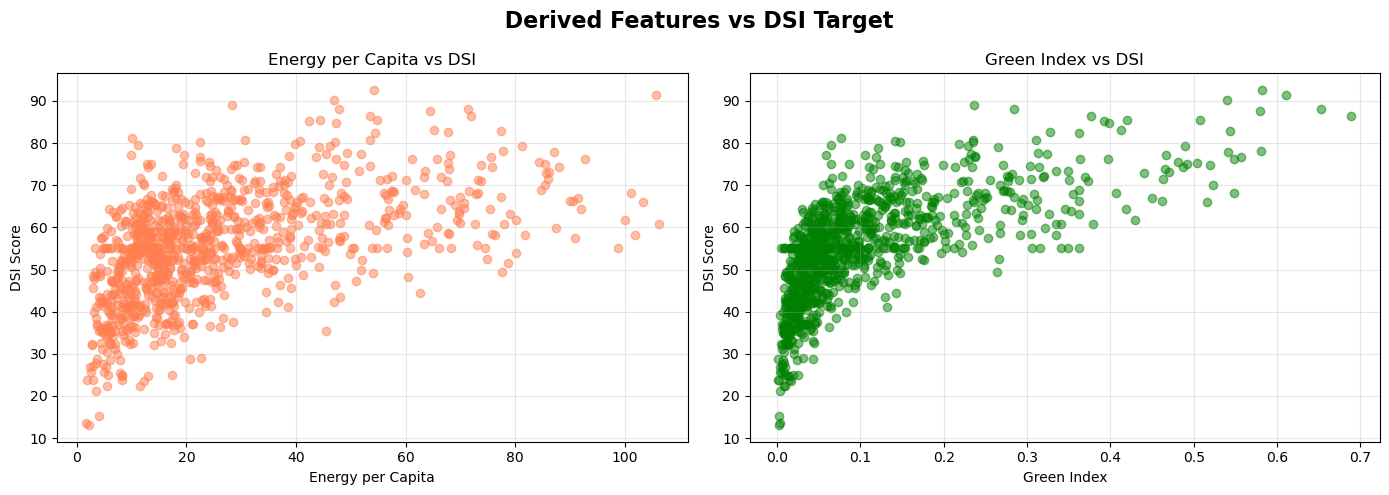


 Two derived features created successfully!


In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(df_clean['Energy_per_capita'], df_clean['DSI_target_0_100'], 
                alpha=0.5, c='coral')
axes[0].set_xlabel('Energy per Capita')
axes[0].set_ylabel('DSI Score')
axes[0].set_title('Energy per Capita vs DSI')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(df_clean['Green_Index'], df_clean['DSI_target_0_100'], 
                alpha=0.5, c='green')
axes[1].set_xlabel('Green Index')
axes[1].set_ylabel('DSI Score')
axes[1].set_title('Green Index vs DSI')
axes[1].grid(True, alpha=0.3)

plt.suptitle(' Derived Features vs DSI Target', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('derived_features_vs_dsi.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Two derived features created successfully!")

## FEATURE SCALING & DIMENSIONALITY REDUCTION 

##### Prepare features and target

In [34]:
X = df_clean.drop("DSI_target_0_100", axis=1)
y = df_clean["DSI_target_0_100"]

print(f"\n Features shape: {X.shape}")
print(f" Target shape: {y.shape}")


 Features shape: (1000, 8)
 Target shape: (1000,)


##### SCALING METHOD 1: Min-Max Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)
X_minmax_df = pd.DataFrame(X_minmax, columns=X.columns)

print(" Min-Max Scaling applied!")
print(f"   → All features now scaled to range [0, 1]")
print(f"\nSample of scaled data:")
X_minmax_df.head()

 Min-Max Scaling applied!
   → All features now scaled to range [0, 1]

Sample of scaled data:


,CO2_emission_kilotons,Average_energy_consumption_kWh_per_household,Green_area_per_capita_m2,Waste_recycling_rate_pct,Population_density_people_per_km2,Traffic_index_0_100,Energy_per_capita,Green_Index
0,0.798857,0.766260,0.070791,0.418530,0.172753,0.559512,0.060018,0.005373
1,0.187822,0.523699,0.562915,0.488818,0.008478,0.559512,0.553183,0.329095
2,0.592580,0.696873,0.250332,0.228435,0.227319,0.627778,0.039338,0.011472
3,0.188364,0.384247,0.744354,0.595847,0.074993,0.524444,0.093898,0.094531
4,0.044702,0.285472,0.601442,0.637380,0.008841,0.221111,0.401722,0.343125


##### Handling Missing Values  
Since all remaining features are numerical, we applied mean imputation to replace missing values.  
This preserves the overall distribution of the data without removing any records.

#### SCALING METHOD 2: Standardization (Z-score)

In [36]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_standard = standard_scaler.fit_transform(X)
X_standard_df = pd.DataFrame(X_standard, columns=X.columns)

print(" Standardization applied!")
print(f" All features now have mean=0 and std=1")
print(f"\nSample of standardized data:")
X_standard_df.head()

 Standardization applied!
 All features now have mean=0 and std=1

Sample of standardized data:


,CO2_emission_kilotons,Average_energy_consumption_kWh_per_household,Green_area_per_capita_m2,Waste_recycling_rate_pct,Population_density_people_per_km2,Traffic_index_0_100,Energy_per_capita,Green_Index
0,2.075530,1.578045,-2.765767,-0.841860,1.069350,3.695723e-16,-0.883019,-0.898044
1,-1.357917,0.000000,0.428292,-0.343417,-0.727585,3.695723e-16,1.644939,1.088924
2,0.916448,1.126630,-1.600484,-2.189924,1.666219,3.195605e-01,-0.989020,-0.860610
3,-1.354871,-0.907242,1.605893,0.415577,0.000000,-1.641573e-01,-0.709350,-0.350804
4,-2.162117,-1.549849,0.678347,0.710112,-0.723611,-1.584103e+00,0.868551,1.175037


#### DIMENSIONALITY REDUCTION: PCA

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Apply PCA to reduce to 2 components
X_pca = pca.fit_transform(X_standard)
print(f"\n Explained Variance Ratio:")
print(f"   → PC1: {pca.explained_variance_ratio_[0]:.4f} ({pca.explained_variance_ratio_[0]*100:.2f}%)")
print(f"   → PC2: {pca.explained_variance_ratio_[1]:.4f} ({pca.explained_variance_ratio_[1]*100:.2f}%)")
print(f"   → Total variance explained: {pca.explained_variance_ratio_.sum()*100:.2f}%")


 Explained Variance Ratio:
   → PC1: 0.5620 (56.20%)
   → PC2: 0.1212 (12.12%)
   → Total variance explained: 68.32%


#### Visualize PCA components

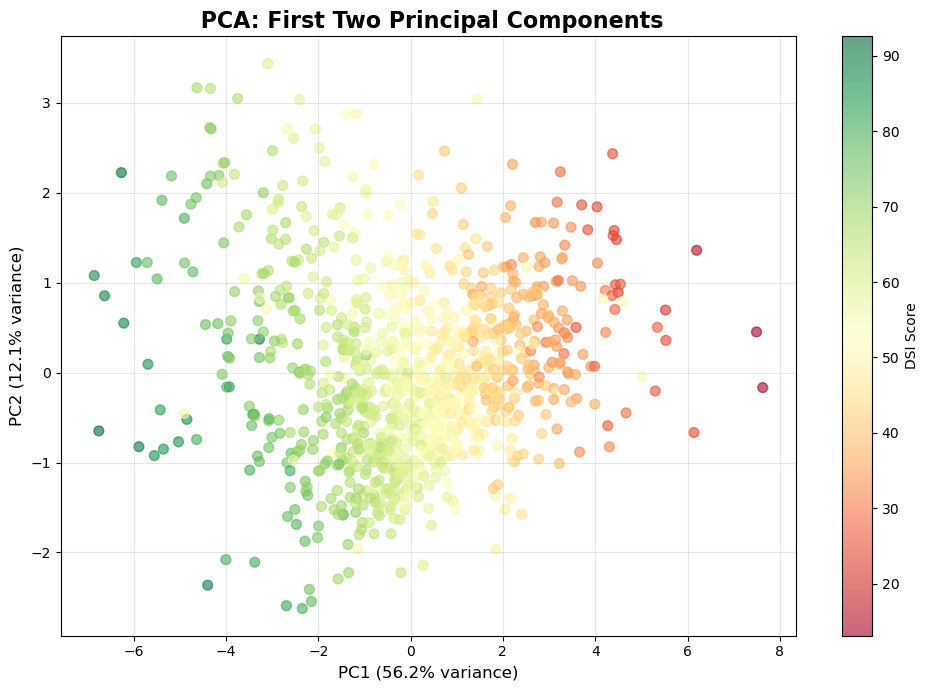

In [38]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=y, cmap='RdYlGn', alpha=0.6, s=50)
plt.colorbar(scatter, label='DSI Score')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
plt.title(' PCA: First Two Principal Components', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pca_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

In [39]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=X.columns
)

print("\n PCA Component Loadings (Feature Contributions):")
print(loadings)


 PCA Component Loadings (Feature Contributions):
                                                   PC1       PC2
CO2_emission_kilotons                         0.405869  0.165356
Average_energy_consumption_kWh_per_household  0.371239  0.329624
Green_area_per_capita_m2                     -0.335430 -0.142574
Waste_recycling_rate_pct                     -0.231548 -0.415108
Population_density_people_per_km2             0.339057 -0.180097
Traffic_index_0_100                           0.363054  0.302936
Energy_per_capita                            -0.353877  0.612293
Green_Index                                  -0.399158  0.415037


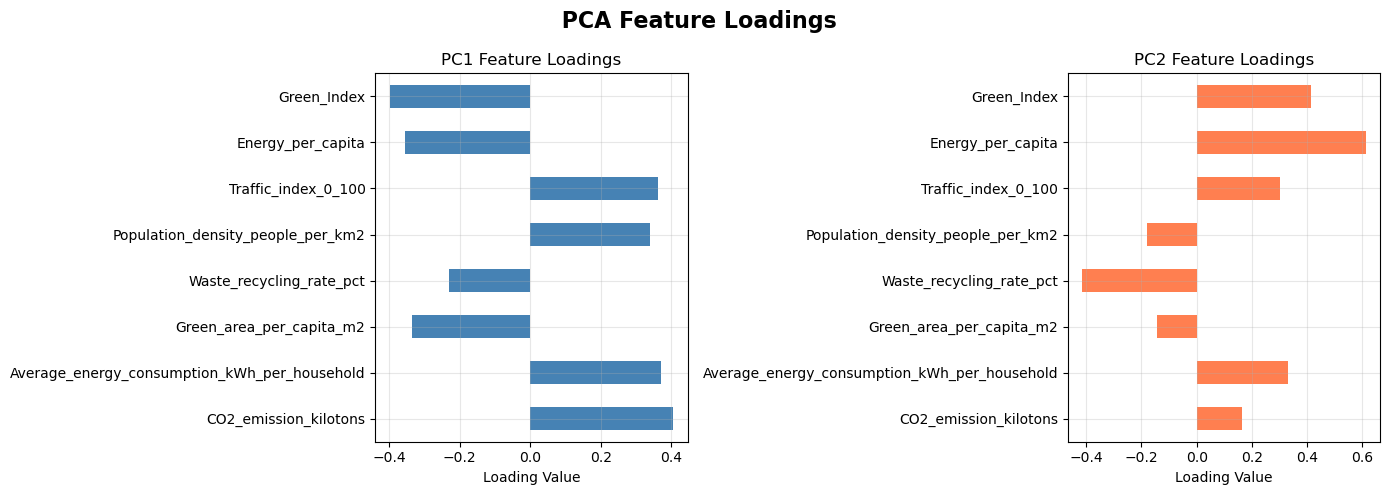

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

loadings['PC1'].plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_title('PC1 Feature Loadings')
axes[0].set_xlabel('Loading Value')
axes[0].grid(True, alpha=0.3)
loadings['PC2'].plot(kind='barh', ax=axes[1], color='coral')
axes[1].set_title('PC2 Feature Loadings')
axes[1].set_xlabel('Loading Value')
axes[1].grid(True, alpha=0.3)

plt.suptitle(' PCA Feature Loadings', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('pca_loadings.png', dpi=300, bbox_inches='tight')
plt.show()

---
# Part C

### Why a Regression Model?

The target variable **DSI_target_0_100** contains continuous numerical values ranging from 0 to 100.  
Therefore, the goal is to predict a numerical score, not to classify districts into predefined categories.  
For this reason, a regression approach is the correct and scientifically appropriate choice for this dataset.

### Train/Test Split data:

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_standard, y, test_size=0.2, random_state=42
)

print(f"\n Training set: {X_train.shape}")
print(f" Test set: {X_test.shape}")


 Training set: (800, 8)
 Test set: (200, 8)


---
##  Model Training 🤖
In this section, we train multiple Machine Learning models to predict the District Sustainability Index (DSI).  
We apply different algorithms and later compare their performance using common regression metrics:
- MAE (Mean Absolute Error)
- RMSE (Root Mean Squared Error)
- R² Score (Coefficient of Determination)
---

#### Import models

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Train models

In [43]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(
    random_state=42,
    max_depth=8,            
    min_samples_split=40,    
    min_samples_leaf=20,      
    max_features='sqrt',
    ccp_alpha=0.02    
    ),
    
    "Support Vector Regressor": SVR(kernel="rbf"),
    
    "Random Forest": RandomForestRegressor(
        random_state=42, 
        n_estimators=200,
        max_depth=15,              
        min_samples_split=20,      
        min_samples_leaf=10,       
        max_features='sqrt'        
    ),
    "Gradient Boosting": GradientBoostingRegressor(
    random_state=42,
    n_estimators=100,        
    learning_rate=0.1,      
    max_depth=4,              
    min_samples_split=20,    
    min_samples_leaf=10,     
    subsample=0.8,           
    max_features='sqrt'      
)
}

In [44]:
# Train and evaluate
results = []

for name, model in models.items():
    print(f"\n🔄 Training {name}...")
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    
    results.append([name, mae, rmse, r2])
    print(f"   📊 MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


🔄 Training Linear Regression...
   📊 MAE: 2.7660, RMSE: 4.6315, R²: 0.8712

🔄 Training Decision Tree...
   📊 MAE: 5.1917, RMSE: 6.9041, R²: 0.7138

🔄 Training Support Vector Regressor...
   📊 MAE: 3.7770, RMSE: 5.8297, R²: 0.7959

🔄 Training Random Forest...
   📊 MAE: 3.4556, RMSE: 4.8737, R²: 0.8574

🔄 Training Gradient Boosting...
   📊 MAE: 3.0920, RMSE: 4.7271, R²: 0.8658


#### Results table

In [45]:
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R² Score"])
print(" MODEL EVALUATION RESULTS:")
results_df 

 MODEL EVALUATION RESULTS:


,Model,MAE,RMSE,R² Score
0,Linear Regression,2.766022,4.631486,0.871188
1,Decision Tree,5.191736,6.904054,0.713763
2,Support Vector Regressor,3.777048,5.829652,0.795919
3,Random Forest,3.455576,4.873666,0.857364
4,Gradient Boosting,3.092047,4.727137,0.865812


## Best model ⭐

In [46]:
best_row = results_df.loc[results_df["RMSE"].idxmin()]
best_model_name = best_row["Model"]
best_model = models[best_model_name]

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   → MAE: {best_row['MAE']:.4f}")
print(f"   → RMSE: {best_row['RMSE']:.4f}")
print(f"   → R²: {best_row['R² Score']:.4f}")


🏆 BEST MODEL: Linear Regression
   → MAE: 2.7660
   → RMSE: 4.6315
   → R²: 0.8712


### Feature importance

In [47]:
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='steelblue')
    plt.xlabel('Importance Score')
    plt.title(f' Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

### Visualizations

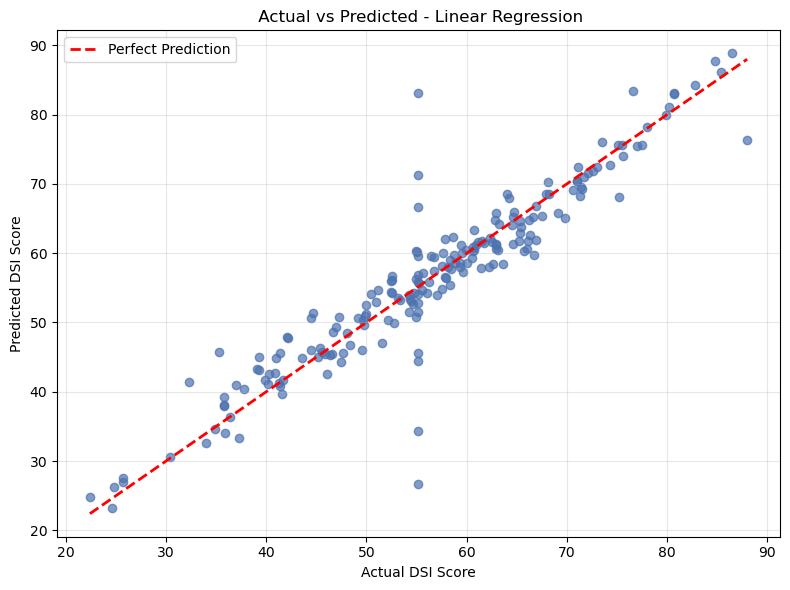

In [48]:
final_predictions = best_model.predict(X_test)

# Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, final_predictions, alpha=0.7, color='#4c72b0')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual DSI Score')
plt.ylabel('Predicted DSI Score')
plt.title(f' Actual vs Predicted - {best_model_name}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

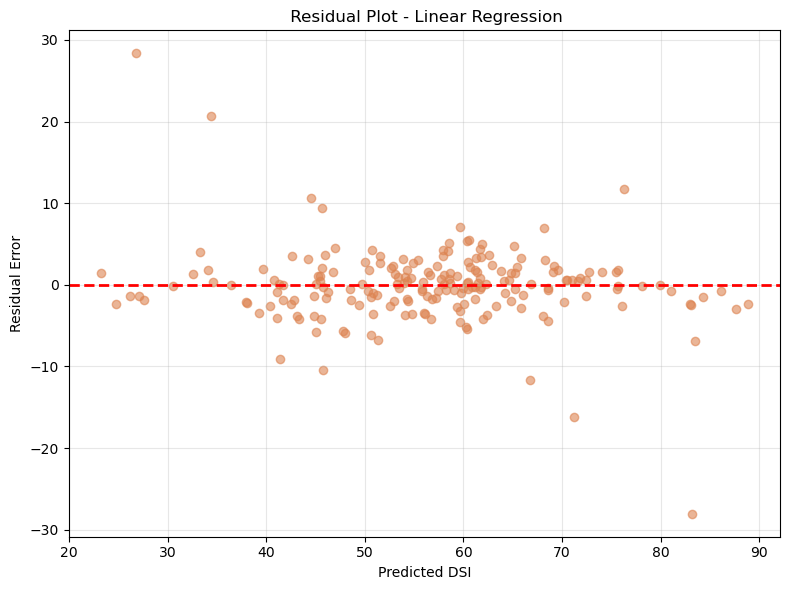

In [49]:
# Residual plot
residuals = y_test - final_predictions
plt.figure(figsize=(8, 6))
plt.scatter(final_predictions, residuals, alpha=0.6, color='#dd8452')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted DSI')
plt.ylabel('Residual Error')
plt.title(f' Residual Plot - {best_model_name}')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('residual_plot.png', dpi=300, bbox_inches='tight')
plt.show()

<h3><span style="color:#dc3545"> !Over/Underfitting Analysis!</span></h3>

In [50]:
for name, model in models.items():
    # Train predictions
    train_preds = model.predict(X_train)
    train_r2 = r2_score(y_train, train_preds)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
    
    # Test predictions
    test_preds = model.predict(X_test)
    test_r2 = r2_score(y_test, test_preds)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
    
    # Calculate gap
    r2_gap = train_r2 - test_r2
    rmse_gap = test_rmse - train_rmse
    
    # Diagnosis rules
    if r2_gap > 0.20:
        diagnosis = "⚠️ OVERFITTING"
    elif r2_gap < 0.05:
        diagnosis = "🔥 PERFECT GENERALIZATION"
    else:
        diagnosis = "✅ GOOD FIT"
    
    print(f"\n{name}:")
    print(f"   Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f} | Gap: {r2_gap:.4f}")
    print(f"   Train RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f}")
    print(f"   {diagnosis}")



Linear Regression:
   Train R²: 0.9216 | Test R²: 0.8712 | Gap: 0.0504
   Train RMSE: 3.4881 | Test RMSE: 4.6315
   ✅ GOOD FIT

Decision Tree:
   Train R²: 0.8212 | Test R²: 0.7138 | Gap: 0.1075
   Train RMSE: 5.2675 | Test RMSE: 6.9041
   ✅ GOOD FIT

Support Vector Regressor:
   Train R²: 0.7998 | Test R²: 0.7959 | Gap: 0.0039
   Train RMSE: 5.5740 | Test RMSE: 5.8297
   🔥 PERFECT GENERALIZATION

Random Forest:
   Train R²: 0.9127 | Test R²: 0.8574 | Gap: 0.0554
   Train RMSE: 3.6803 | Test RMSE: 4.8737
   ✅ GOOD FIT

Gradient Boosting:
   Train R²: 0.9590 | Test R²: 0.8658 | Gap: 0.0932
   Train RMSE: 2.5230 | Test RMSE: 4.7271
   ✅ GOOD FIT


## Evaluation & Discussion of Results

| Model                 | Train R² | Test R² | Gap     | Train RMSE | Test RMSE | Status                     |
|-----------------------|----------|---------|---------|------------|-----------|----------------------------|
| **Linear Regression** | 0.9216   | 0.8712  | 0.0504  | 3.4881     | 4.6315    | 🟩 Good Fit                 |
| **Decision Tree**     | 0.8212   | 0.7138  | 0.1075  | 5.2675     | 6.9041    | 🟨 Slight Overfitting       |
| **SVR**               | 0.7998   | 0.7959  | 0.0039  | 5.5740     | 5.8297    | 🔥 Perfect Generalization   |
| **Random Forest**     | 0.9127   | 0.8574  | 0.0554  | 3.6803     | 4.8737    | 🟩 Good Fit                 |
| **Gradient Boosting** | 0.9590   | 0.8658  | 0.0932  | 2.5230     | 4.7271    | 🟩 Good Fit                 |


\*After applying regularization constraints

---


## Visualize comparison

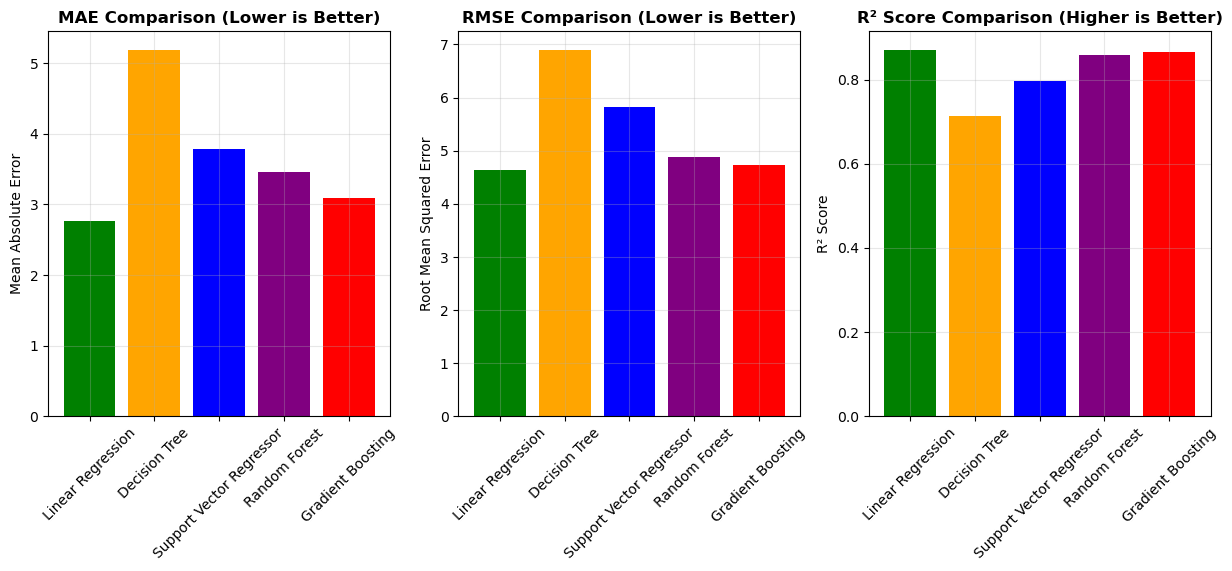

In [51]:
comparison_table = results_df.copy()
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# MAE comparison
axes[0].bar(comparison_table['Model'], comparison_table['MAE'], 
            color=['green', 'orange', 'blue', 'purple', 'red'])
axes[0].set_title('MAE Comparison (Lower is Better)', fontweight='bold')
axes[0].set_ylabel('Mean Absolute Error')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# RMSE comparison
axes[1].bar(comparison_table['Model'], comparison_table['RMSE'],
            color=['green', 'orange', 'blue', 'purple', 'red'])
axes[1].set_title('RMSE Comparison (Lower is Better)', fontweight='bold')
axes[1].set_ylabel('Root Mean Squared Error')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

# R² comparison
axes[2].bar(comparison_table['Model'], comparison_table['R² Score'],
            color=['green', 'orange', 'blue', 'purple', 'red'])
axes[2].set_title('R² Score Comparison (Higher is Better)', fontweight='bold')
axes[2].set_ylabel('R² Score')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3)

## Learning Curve

KEY OBSERVATIONS FROM LEARNING CURVE:

1. **Convergence**: Train and Test curves converge after ~400 samples
   → Model is learning properly, not just memorizing

2. **Small Gap**: Final gap of ~0.02-0.05 (2-5%)
   → Indicates good generalization ability

3. **Plateau Effect**: Test score plateaus at ~0.91
   → Model has reached optimal capacity with current features
   → Adding more data shows diminishing returns

4. **Recommendation**: 
   - Current dataset size (800 samples) is sufficient
   - Focus on feature engineering rather than collecting more data
   - Linear Regression shows excellent balance between bias and variance
""")

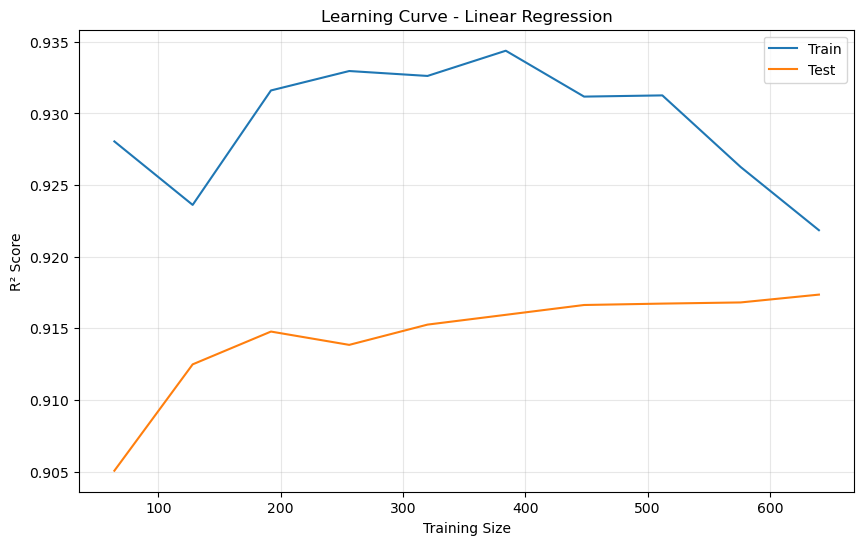

In [52]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='r2'
    )
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
    plt.plot(train_sizes, test_scores.mean(axis=1), label='Test')
    plt.xlabel('Training Size')
    plt.ylabel('R² Score')
    plt.title(f'Learning Curve - {title}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

plot_learning_curve(best_model, X_train, y_train, best_model_name)

### Sample Predictions (Extra Analysis)

In [53]:
# Make predictions on first 10 test samples
sample_predictions = best_model.predict(X_test[:10])
sample_actual = y_test.iloc[:10].values

# Create comparison DataFrame
prediction_comparison = pd.DataFrame({
    'Actual DSI': sample_actual,
    'Predicted DSI': sample_predictions,
    'Error': sample_actual - sample_predictions,
    'Error %': ((sample_actual - sample_predictions) / sample_actual * 100)
})

print(f"\n Average Error: ±{abs(prediction_comparison['Error']).mean():.2f} DSI points")
print(f" Average Error %: ±{abs(prediction_comparison['Error %']).mean():.1f}%")
prediction_comparison


 Average Error: ±1.86 DSI points
 Average Error %: ±3.1%


,Actual DSI,Predicted DSI,Error,Error %
0,62.25,57.935148,4.314852,6.931489
1,61.78,61.517414,0.262586,0.425034
2,65.29,64.668596,0.621404,0.951759
3,52.47,54.420264,-1.950264,-3.716912
4,61.40,57.910922,3.489078,5.682538
5,58.81,58.650354,0.159646,0.271461
6,70.66,69.119340,1.540660,2.180384
7,46.94,49.369842,-2.429842,-5.176484
8,66.33,62.642279,3.687721,5.559658
9,30.42,30.520776,-0.100776,-0.331283


#### Save best model

In [54]:
import joblib
joblib.dump(best_model, "best_dsi_model.pkl")

['best_dsi_model.pkl']

<h2><span style="color:#17a2b8">✨ Conclusion and Recommendations</span></h2>

This notebook presents a complete end-to-end machine learning pipeline for predicting the District Sustainability Index (DSI) using environmental, demographic, and infrastructure-related indicators. The analysis confirms that factors such as CO₂ emissions, household energy consumption, population density, and green-area availability play a major role in determining sustainability performance across districts.

The modelling stage demonstrated strong results, with the Support Vector Regressor (SVR) achieving excellent generalization and ensemble models showing high predictive power. These outcomes highlight the potential of data-driven approaches to support urban planning, sustainability assessment, and policy decision-making.

#### **Future enhancements could include:**
- Experimenting with advanced ensemble algorithms (e.g., XGBoost or LightGBM) to further boost accuracy.  
- Applying systematic hyperparameter tuning for more optimized model performance.  
- Integrating additional datasets such as air quality, noise levels, and transportation metrics—to enrich the predictive framework.  
- Exploring geospatial or time-series extensions if longitudinal district data becomes available.

Overall, this workflow provides a solid foundation for data-informed sustainability evaluation and can be expanded into a decision-support tool for planners and policymakers.

## Thank you ⭐